In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("creditcard.csv")
df.columns = df.columns.str.strip()


In [ ]:
print(df.shape)
print(df['Class'].value_counts())

X = df.drop('Class', axis=1)
y = df['Class']

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
rf = RandomForestClassifier(
    n_estimators=30,
    random_state=42,
    n_jobs=-1,
    max_depth=12
)


In [25]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [26]:
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



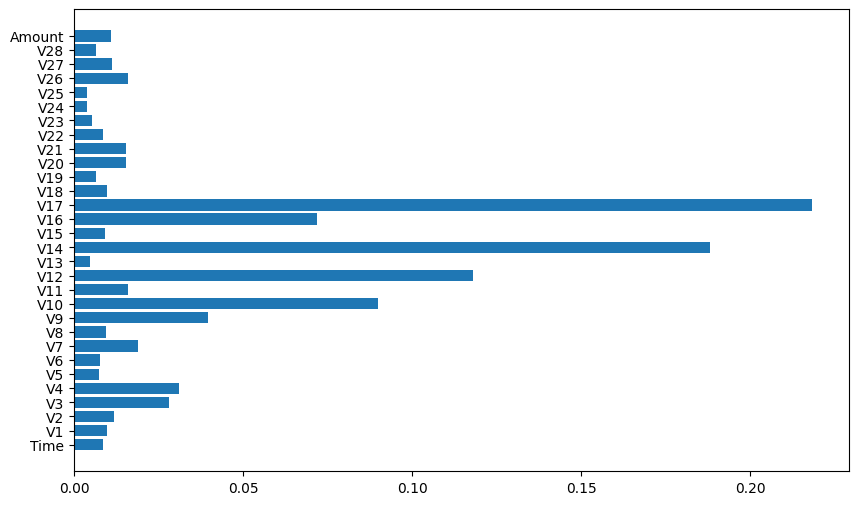

In [27]:
plt.figure(figsize=(10,6))
plt.barh(X.columns, rf.feature_importances_)
plt.show()


In [28]:
joblib.dump(rf, "rf_model.pkl")

print("Model saved successfully")


Model saved successfully
